In [1]:
!python --version

Python 3.6.4 :: Anaconda, Inc.


In [2]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline 

# Constants:

\begin{align}
\Omega
\end{align}

Om0 = initial Ω rotation of earth in radians/years, with respect to distant stars

\begin{align}
\omega
\end{align}

om0 = initial ω revolution of moon in radians/secs

\begin{align}
M
\end{align}

M = mass of Earth

\begin{align}
R
\end{align}

R = radius of Earth

\begin{align}
N_{B}
\end{align}

NB = Normal force N_B

\begin{align}
r
\end{align}

r = radius of moon's orbit

\begin{align}
m
\end{align}

m = mass of moon

\begin{align}
\eta
\end{align}

eta = percentage of energy lost by the earth due to tidal friction that goes to the moon

\begin{align}
\mu
\end{align}

u = coefficient of friction

\begin{align}
G
\end{align}

G = Gravitational constant in m^3 kg^-1 yr^-2

\begin{align}
\gamma
\end{align}

Y = G*M

# The Equations:

### Earth's Rotational Velocity, Ω(t)

\begin{align}
-\mu_{k}N_{B}(\Omega-\omega)=\frac{2}{5}MR_{E}\Omega\bigg(\frac{d\Omega}{dt}\bigg)
\end{align}

### The Moon's Angular Velocity, ω(t)

\begin{align}
\frac{6}{5}\eta MR^{2}_{E}\Omega\bigg(\frac{d\Omega}{dt}\bigg)=\gamma^{\frac{2}{3}}m\omega^{-\frac{1}{3}}\bigg(\frac{d\omega}{dt}\bigg)
\end{align}

### Earth-Moon Distance, r(t)

\begin{align}
r=\gamma^{\frac{1}{3}}\omega^{-\frac{2}{3}}
\end{align}

# Solving for Ω(t) and ω(t):

\begin{align}
\bigg(\frac{d\Omega}{dt}\bigg)=-\frac{5}{2}\frac{\mu_{k}N_{B}(\Omega-\omega)}{MR_{E}\Omega},\bigg(\frac{d\omega}{dt}\bigg)=\frac{6}{5}\frac{\eta MR^{2}_{E}\Omega}{\gamma^{\frac{2}{3}}m\omega^{-\frac{1}{3}}}\bigg(\frac{d\Omega}{dt}\bigg)
\end{align}

In [3]:
Om0=2301.21649
om0=84.889944
M=5.972*(10**24.0)
R=6371000.0
NB=1.02992455*(10**37) 
r=1737400.0  
m=7.34767309*(10**22.0)
eta=1.0/30.0 
u=0.5731*10**(-12) 
G=66425.34 
Y = G*M
#d0 = 384400000

def W_dt(W, t):
    return [(-5*u*NB*(W[0]-W[1]))/(2*M*R*W[0]), 
            ((6*eta*M*(R**2)*W[0])/(5*Y**(2/3)*m*W[1]**(-1/3)))*(-5*u*NB*(W[0]-W[1]))/(2*M*R*W[0])]

ts = np.arange(0,10*10**10,10**7)
W0 = [Om0, om0]
Ws = odeint(W_dt, W0, ts)
earth = np.array(Ws[:,0])
moon = np.array(Ws[:,1])

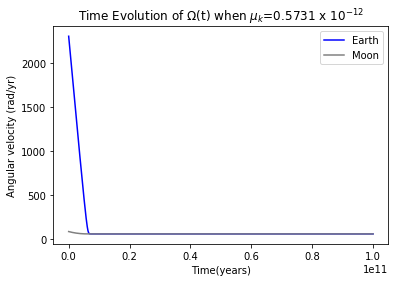

In [4]:
plt.plot(ts, earth, label="Earth", c='blue')
plt.plot(ts, moon, label="Moon", c='gray')
plt.xlabel("Time(years)")
plt.ylabel("Angular velocity (rad/yr)")
plt.title('Time Evolution of $\Omega$(t) when $\mu$$_k$=0.5731 x 10$^{-12}$')
plt.legend()

Zooming in...

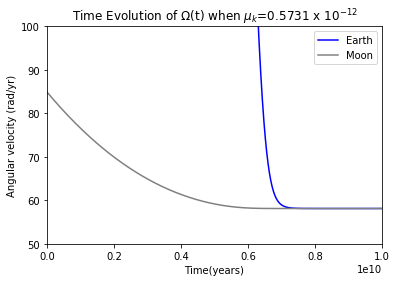

In [5]:
plt.plot(ts, earth, label="Earth", c='blue')
plt.plot(ts, moon, label="Moon", c='gray')
plt.xlabel("Time(years)")
plt.ylabel("Angular velocity (rad/yr)")
plt.title('Time Evolution of $\Omega$(t) when $\mu$$_k$=0.5731 x 10$^{-12}$')
plt.ylim(50,100)
plt.xlim(0,1*10**10)
plt.legend()

In [6]:
"""k=0
while (moon[k]/earth[k] <= 0.99):
    print(moon[k],earth[k],ts[k],moon[k]/earth[k]) 
    # ω(t), Ω(t), yrs, ω(t)/Ω(t)
    k = k+1"""

'k=0\nwhile (moon[k]/earth[k] <= 0.99):\n    print(moon[k],earth[k],ts[k],moon[k]/earth[k]) \n    # ω(t), Ω(t), yrs, ω(t)/Ω(t)\n    k = k+1'

Ω(t) and ω(t) will achieve 99% double synchronous orbit in:

In [7]:
print(str(ts[np.where(moon/earth < 0.99)][-1])+ " years")

7050000000 years


Ω(t) and ω(t) will be equal in:

In [8]:
print(str(ts[np.where(moon/earth == 1)][0])+ " years")

93940000000 years


# Solving for r(t):

\begin{align}
r=\gamma^{\frac{1}{3}}\omega^{-\frac{2}{3}}
\end{align}

Text(0.5,1,'Earth-Moon Distance, r(t)')

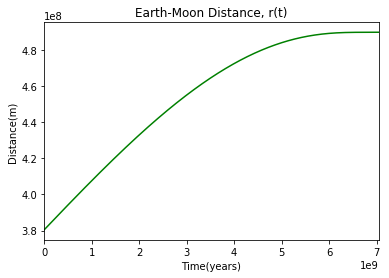

In [9]:
r=np.array((Y**(1/3))*moon**(-2/3))
plt.plot(ts, r, c='green')
plt.xlim(0,ts[np.where(moon/earth < 0.99)][-1])
plt.xlabel("Time(years)")
plt.ylabel("Distance(m)")
plt.title('Earth-Moon Distance, r(t)')

Initial Earth-Moon distance, r(0):

In [10]:
print(str(r[0])+ " m")

380405712.7192103 m


r(t) when ω(t)/Ω(t) = 1

In [11]:
print(str(r[-1])+" m")

489728491.851162 m


r(t) when ω(t)/Ω(t) <= 0.99

In [12]:
print(str(r[np.where(moon/earth <= 0.99)][-1])+ " m")

489726597.335154 m
